In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Documents/Univiersity/HonsProject/MachineLearningcsv/Cleanedcsv1/csvfile_4.csv')
df[' Label'] = df[' Label'].replace({2:'Attack', 1:'Begnin'}    )
df.isna().any


df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Begnin
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Begnin
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Begnin
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Begnin
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Begnin


In [3]:
actual_labels = df[' Label']
samples = df.drop([' Label'], axis=1).values

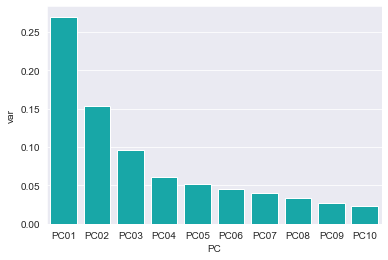

In [4]:
# Standardize the data to have a mean of ~0 and a variance of 1
x_std = StandardScaler().fit_transform(samples)
# Create a PCA instance: pca
n_comp = 10
pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(x_std)

pca.explained_variance_ratio_
df_explained = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC%.2d' %(x+1) for x in range(0, n_comp)]})
fig1 = sns.barplot(x='PC',y="var", 
           data=df_explained, color="c")

In [5]:
pc_df = pd.DataFrame(data = principalComponents , 
        columns = ['PC%.2d' %(x+1) for x in range(0, n_comp)])
pc_df['Cluster'] = actual_labels
pc_df.head()

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,Cluster
0,3.814267,3.897154,1.012941,-0.712197,-0.162779,1.598312,-1.333731,-0.433675,0.353421,-0.389411,Begnin
1,3.815879,3.896103,1.012788,-0.713043,-0.162631,1.597669,-1.332876,-0.434772,0.352913,-0.389296,Begnin
2,-1.486597,-0.067464,0.685031,0.290708,1.752151,-1.364821,-0.498168,0.941900,-2.950693,-2.165608,Begnin
3,3.799364,3.864159,0.933661,-0.715162,-0.149026,1.613012,-1.331131,-0.430913,0.350074,-0.388067,Begnin
4,-1.652746,-0.020289,0.912283,0.130698,1.913282,-1.162348,-0.788838,1.272788,-3.615271,-2.164328,Begnin


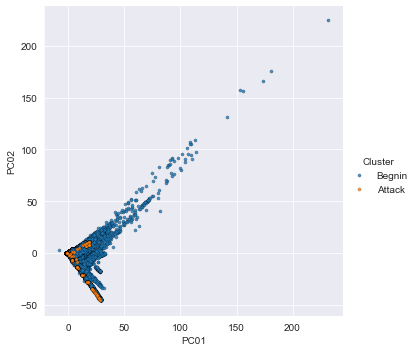

In [6]:
fig2 = sns.lmplot( x="PC01", y="PC02",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={'s':10, 'edgecolors':"black", 'linewidth':.2}) # specify the point size


In [7]:
kmeans = KMeans(n_clusters=3)



#kmeans.fit(samples)
y_km = kmeans.fit_predict(pc_df.drop(['Cluster'],axis=1))
y_km


kmeans.labels_

clusters = kmeans.cluster_centers_

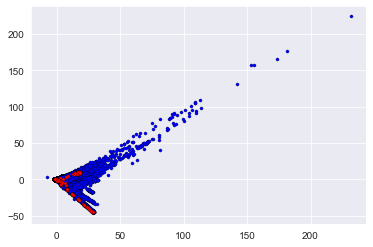

In [8]:
n = 0
m = 1

colA = pc_df.columns[n]
colB = pc_df.columns[m]

fig3 = plt.figure()
plt.scatter(pc_df.loc[pc_df['Cluster'] == 'Begnin'][colA], pc_df.loc[pc_df['Cluster'] == 'Begnin'][colB], s=10, edgecolors="black", linewidth=.2, color='blue')
plt.scatter(pc_df.loc[pc_df['Cluster'] == 'Attack'][colA], pc_df.loc[pc_df['Cluster'] == 'Attack'][colB], s=10, edgecolors="black", linewidth=.2, color='red')



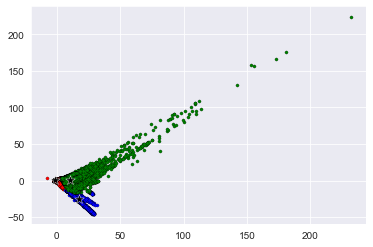

In [9]:
fig4 = plt.figure()
plt.scatter(pc_df[y_km == 0][colA], pc_df[y_km == 0][colB], s=10, edgecolors="black", linewidth=.2, color='red')
plt.scatter(pc_df[y_km == 1][colA], pc_df[y_km == 1][colB], s=10, edgecolors="black", linewidth=.2, color='blue')
plt.scatter(pc_df[y_km == 2][colA], pc_df[y_km == 2][colB], s=10, edgecolors="black", linewidth=.2, color="green")



plt.scatter(clusters[0][n], clusters[0][m], marker='*', s=100, edgecolors="white", linewidth=.4, color='black')
plt.scatter(clusters[1][n], clusters[1][m], marker='*', s=100, edgecolors="white", linewidth=.4, color='black')
plt.scatter(clusters[2][n], clusters[2][m], marker='*', s=100, edgecolors="white", linewidth=.4, color='black')



In [10]:
# Compute confusion matrix
labels = {0:'Attack',1:'Begnin', 2:'Potential'}    
y_true = list(actual_labels)   
y_pred = [ labels[x] for x in list(y_km) ]    
    
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Attack','Begnin', 'Potential'])

cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['Attack','Begnin', 'Potential']), 
    index=['true:Attack', 'true:Begnin', 'true:Potential'], 
    columns=['pred:Attack', 'pred:Begnin', 'pred:Potential'])

cmtx

,pred:Attack,pred:Begnin,pred:Potential
true:Attack,158669,173,88
true:Begnin,103511,1840,22186
true:Potential,0,0,0
